In [40]:
import pandas as pd
import igraph as ig
import numpy as np
import os
from pathlib import Path

In [41]:
dir = '../scraped-1pWjP9QNLcg-12.11 19-10-2023'
edges = pd.read_csv(os.path.join(dir, 'edge_df-1pWjP9QNLcg.csv'))
vertices = pd.read_csv(os.path.join(dir, 'vertex_df-1pWjP9QNLcg.csv')) # each row in vertices is unique

In [42]:
edges_with_destination = edges[(edges['dest_scraped'].notna()) & (edges['kind'] != 'youtube#commentThread')]
print(edges_with_destination.shape)
edges_with_destination.head()

(300, 11)


,comment_id,threath_id,time,kind,author_id,dest_scraped,likes,num_replies,text,video_id,dest_id
78,Ugx3EjEUzELcXnsK31N4AaABAg.9sX97TmU1WT9sZYrN-tkSX,Ugx3EjEUzELcXnsK31N4AaABAg,2023-07-24T21:02:34Z,youtube#comment,UCC35EnAeuy4lLGTjIQHuLTQ,ChristenDOM? helemaal,1,NaN,@ChristenDOM? helemaal mee eens!,1pWjP9QNLcg,UCOtHqJeZ2OG0FrJRUOwaieg
79,Ugx3EjEUzELcXnsK31N4AaABAg.9sX97TmU1WT9suqvucIUih,Ugx3EjEUzELcXnsK31N4AaABAg,2023-08-02T12:52:30Z,youtube#comment,UCEngHxSN_kcZYoavVA4i7Ow,ChristenDOM?Christendom is,0,NaN,​​@ChristenDOM?Christendom is een joodse sect ...,1pWjP9QNLcg,UCOtHqJeZ2OG0FrJRUOwaieg
90,UgyEkmq44td6yWcDbmp4AaABAg.9sWKNWsWV679sWvdXCgzpQ,UgyEkmq44td6yWcDbmp4AaABAg,2023-07-23T20:32:40Z,youtube#comment,UCk7p83NSuNlDbT3eArf67Yw,Alf Brans,0,NaN,@Alf Brans alias de prutspapegaai,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A
91,UgyEkmq44td6yWcDbmp4AaABAg.9sWKNWsWV679sZKcPATFx-,UgyEkmq44td6yWcDbmp4AaABAg,2023-07-24T18:58:11Z,youtube#comment,UCOtHqJeZ2OG0FrJRUOwaieg,Alf Brans,0,NaN,@Alf Brans ok,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A
96,Ugz5eerHs-tU206lvrp4AaABAg.9sW6TWAFi3I9snQNMCIhs5,Ugz5eerHs-tU206lvrp4AaABAg,2023-07-30T15:37:02Z,youtube#comment,UCFPb9eToj2c4JlktoX6Ki5A,Alf Brans,1,NaN,@Alf Brans Beide dragen toch een onderbroek of...,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A


In [43]:
edges_with_destination['from.To'] = edges_with_destination['author_id'] + '.' + edges_with_destination['dest_id'] # new column

/var/folders/y7/_zszvpn176l12y354k0l6t6c0000gn/T/ipykernel_89704/2772748872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges_with_destination['from.To'] = edges_with_destination['author_id'] + '.' + edges_with_destination['dest_id'] # new column


In [44]:
unique_edges_with_destination = edges_with_destination.drop_duplicates(subset=['from.To'])

In [45]:
unique_edges_with_destination = unique_edges_with_destination[~unique_edges_with_destination['dest_id'].isna()]
unique_edges_with_destination.isna().sum()

comment_id        0
threath_id        0
time              0
kind              0
author_id         0
dest_scraped      0
likes             0
num_replies     190
text              0
video_id          0
dest_id           0
from.To           0
dtype: int64

In [46]:
vertices.columns

Index(['author_id', 'display_title', 'customer_url', 'member_since',
       'subscriber_count', 'view_count', 'video_count'],
      dtype='object')

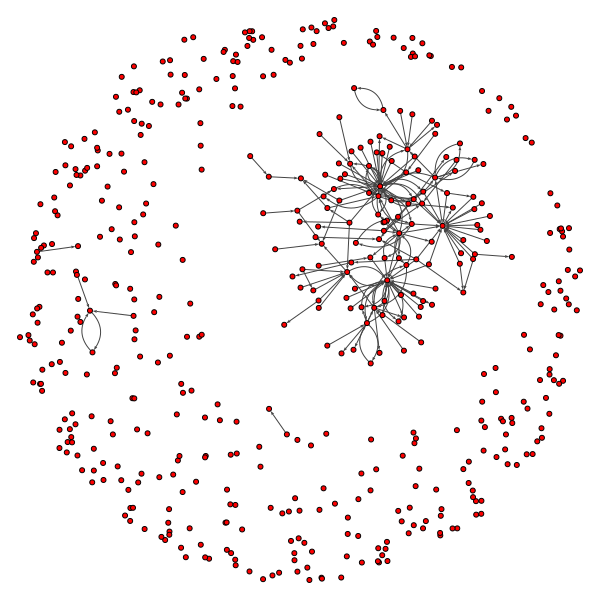

In [50]:
senderReceiver = zip(unique_edges_with_destination['author_id'], unique_edges_with_destination['dest_id'])

edgelist = []
for author, dest in senderReceiver:
    edgelist.append((author, dest))

unique_vertices = vertices['author_id'].unique()
verticelist = list(unique_vertices)

mygraph = ig.Graph(directed=True)
mygraph.add_vertices(verticelist)
mygraph.add_edges(edgelist)

# make the layout of the edges in the plot more ordered
ig.plot(mygraph, layout="kamada_kawai", vertex_size=5, edge_arrow_size=0.3)

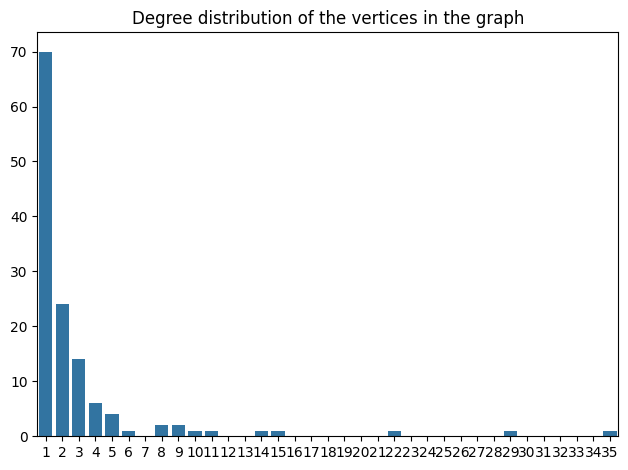

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a degree distribution plot of the graph
degrees = mygraph.degree()
# plot the degree distribution
degree_vc = pd.Series(degrees).value_counts().sort_index()

degree_dict = {}
for i in range(1, max(degrees)+1):
    if i not in degree_vc.index:
        degree_dict[i] = 0
    else:
      degree_dict[i] = degree_vc[i]

sns.barplot(x=list(degree_dict.keys()), y=list(degree_dict.values()))
plt.title('Degree distribution of the vertices in the graph')
plt.tight_layout()

In [56]:
"""
Descriptives to gather:
- Total number of comments of the video
- Number mainCommentThreaths
- Number of distinct authors
- Number of handles
- Number of distinct handles
"""

# Video ID
videourl = 'https://www.youtube.com/watch?v=1pWjP9QNLcg'

# Total number of comments of the video
total_comments = edges.shape[0]

# Number mainCommentThreaths
main_comment_threads = edges[edges['kind'] == 'youtube#commentThread'].shape[0]

# Number of distinct authors
distinct_authors = vertices.shape[0]

# Number of handles
total_handles = len(edges_with_destination)

# Number of distinct handles (a.k.a. number of unique interactions)
distinct_handels = unique_edges_with_destination.shape[0]

print(f'Describing statistics of the video: {videourl}',
      f'Total number of comments: {total_comments}',
      f'Number of main comment threads: {main_comment_threads}',
      f'Number of distinct authors: {distinct_authors}',
      f'Number of handles: {total_handles}',
      f'Ratio of total handles of compared to total comments: {round(total_handles/total_comments*100, 2)}%',
      f'Number of distinct handles: {distinct_handels}',
      f'Ratio of distinct handles of compared to total comments: {round(distinct_handels/total_comments*100, 2)}%',
      f'Number of vertices without edges: {degree_vc[0]}',
      sep='\n'
      )

Describing statistics of the video: https://www.youtube.com/watch?v=1pWjP9QNLcg
Total number of comments: 1145
Number of main comment threads: 491
Number of distinct authors: 514
Number of handles: 300
Ratio of total handles of compared to total comments: 26.2%
Number of distinct handles: 190
Ratio of distinct handles of compared to total comments: 16.59%
Number of vertices without edges: 384


In [58]:
degree_vc[0] / distinct_authors

0.7470817120622568